In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv(r"C:\Users\admin\Desktop\QVI_transaction_data.csv")
df.head()
df.shape

(264836, 8)

In [3]:
df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

****No NULL values found in the data****

## Finding outliers and removing if any

In [4]:
df["TOT_SALES"].skew()

68.5696313218127

In [5]:
def outlier(x):
    q1,q3=np.percentile(x,[25,75])
    IQR=q3-q1
    LL=q1-1.5*IQR
    UL=q3+1.5*IQR
    return IQR,LL,UL
df[["TOT_SALES"]].apply(outlier) 

,TOT_SALES
0,3.8
1,-0.3
2,14.9


In [6]:
df[(df["TOT_SALES"]<(-0.3))|(df["TOT_SALES"]>14.9)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
11,43332,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0
56,43601,74,74336,73182,84,GrnWves Plus Btroot & Chilli Jam 180g,5,15.5
72,43331,96,96203,96025,7,Smiths Crinkle Original 330g,5,28.5
100,43605,130,130108,134125,2,Cobs Popd Sour Crm &Chives Chips 110g,5,19.0
...,...,...,...,...,...,...,...,...
258715,43328,194,194381,194835,102,Kettle Mozzarella Basil & Pesto 175g,4,21.6
258721,43327,200,200248,199694,3,Kettle Sensations Camembert & Fig 150g,4,18.4
258726,43332,203,203253,203360,28,Thins Potato Chips Hot & Spicy 175g,5,16.5
258729,43601,208,208205,207318,37,Smiths Thinly Swt Chli&S/Cream175G,5,15.0


**The outlier is less than 5% therfore we will use trimming method**

In [7]:
df1=df[(df["TOT_SALES"]>(-0.3))&(df["TOT_SALES"]<14.9)]
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


**Df1 is the new datasheet after removing rectifying and removing all the outliers**

In [117]:
df1["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'Pringles Sthrn Fried

In [126]:
Smiths=df1[df1["PROD_NAME"].str.startswith("Smiths")]
Product=Smiths["PROD_NAME"].unique()
Kettle=df1[df1["PROD_NAME"].str.startswith("Kettle")]
Pro_kett=Kettle["PROD_NAME"].unique()
Cobs=df1[df1["PROD_NAME"].str.startswith("Cobs")]
Pro_cobs=Cobs["PROD_NAME"].unique()
RRD=df1[df1["PROD_NAME"].str.startswith("RRD")]
Pro_RRD=RRD["PROD_NAME"].unique()
Pringles=df1[df1["PROD_NAME"].str.startswith("Pringles")]
Pro_Pri=Pringles["PROD_NAME"].unique()
Natural=df1[df1["PROD_NAME"].str.startswith("Natural")]
Pro_Natu=Natural["PROD_NAME"].unique()
Tostitos=df1[df1["PROD_NAME"].str.startswith("Tostitos")]
Pro_Tos=Tostitos["PROD_NAME"].unique()
Doritos=df1[df1["PROD_NAME"].str.startswith("Doritos")]
Pro_Dor=Doritos["PROD_NAME"].unique()

In [166]:
Smiths['PROD_NAME'] = Smiths['PROD_NAME'].replace( Product,'Smiths chips',regex=True)
Natural['PROD_NAME'] = Natural['PROD_NAME'].replace( Pro_Natu,'Natural chips',regex=False)
Cobs['PROD_NAME'] = Cobs['PROD_NAME'].replace( Pro_cobs,"Cobs chips",regex=False)
Kettle['PROD_NAME'] = Kettle['PROD_NAME'].replace( Pro_kett,'Kettle chips',regex=False)
Pringles['PROD_NAME'] = Pringles['PROD_NAME'].replace( Pro_Pri,'Pringles chips',regex=False)
Tostitos['PROD_NAME'] = Tostitos['PROD_NAME'].replace( Pro_Tos,'Tostitos chips',regex=False)
RRD['PROD_NAME'] = RRD['PROD_NAME'].replace( Pro_RRD,'RRD chips',regex=False)
Doritos['PROD_NAME'] = Doritos['PROD_NAME'].replace( Pro_Dor,'Dortios chips',regex=False)

df_mod=pd.concat([Smiths,Natural,Kettle,RRD,Tostitos,Pringles,Cobs,Doritos])
df_pr=df_mod["PROD_NAME"].unique()
d=[]
for i in df_pr:
    dff=df_mod[df_mod["PROD_NAME"]==i].sum()
    d.append(dff)
dff1=pd.DataFrame(d) 
dff1["PROD_NAME"]=["Smiths chips","Natural chips","Kettle chips","RRD chips","Tostitos chips","Pringles chips","Cobs chips","Dortios chips"]
dff1=dff1.drop(["STORE_NBR","LYLTY_CARD_NBR","TXN_ID","PROD_NBR","DATE"],axis=1) 
dff1   

,PROD_NAME,PROD_QTY,TOT_SALES
0,Smiths chips,54525,209000.7
1,Natural chips,11359,34077.0
2,Kettle chips,78423,387066.2
3,RRD chips,22430,64744.5
4,Tostitos chips,18009,79239.6
5,Pringles chips,47769,176730.5
6,Cobs chips,18460,70148.0
7,Dortios chips,47421,200234.2


<AxesSubplot:xlabel='PROD_NAME', ylabel='TOT_SALES'>

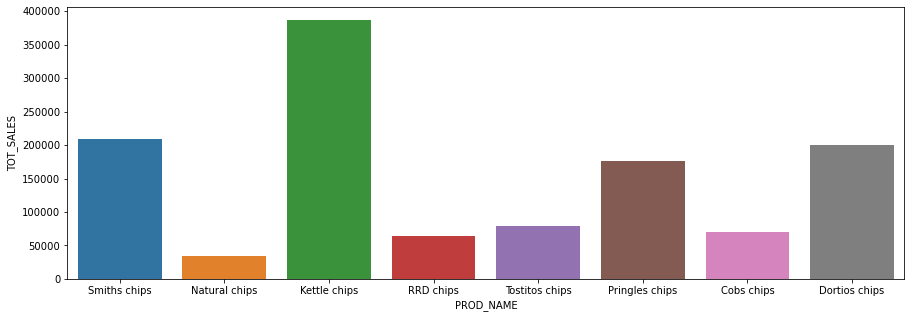

In [185]:
plt.figure(figsize=(15,5))
y=dff1["TOT_SALES"]
x=dff1["PROD_NAME"]
sns.barplot(x,y,data=dff1)

**AMONG ALL KETTLE CHIPS SALES WAS HIGH**

## Doritos chips Evaluation

In [9]:
df3=df1[df1["PROD_NAME"].str.startswith("Doritos")]
df3

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
18,43329,22,22456,18696,93,Doritos Corn Chip Southern Chicken 150g,1,3.9
37,43329,54,54226,48173,51,Doritos Mexicana 170g,1,4.4
57,43599,75,75091,73751,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
63,43600,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264758,43377,269,269125,265774,30,Doritos Corn Chips Cheese Supreme 170g,2,8.8
264797,43345,270,270079,267146,20,Doritos Cheese Supreme 330g,2,11.4
264809,43336,271,271051,268506,47,Doritos Corn Chips Original 170g,2,8.8
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8


**THe below graph represents the Total sales of each product pf doritos chips**                                                  
**WE can find the highest and the lowest sale for a particular product**

<AxesSubplot:xlabel='PROD_NAME', ylabel='TOT_SALES'>

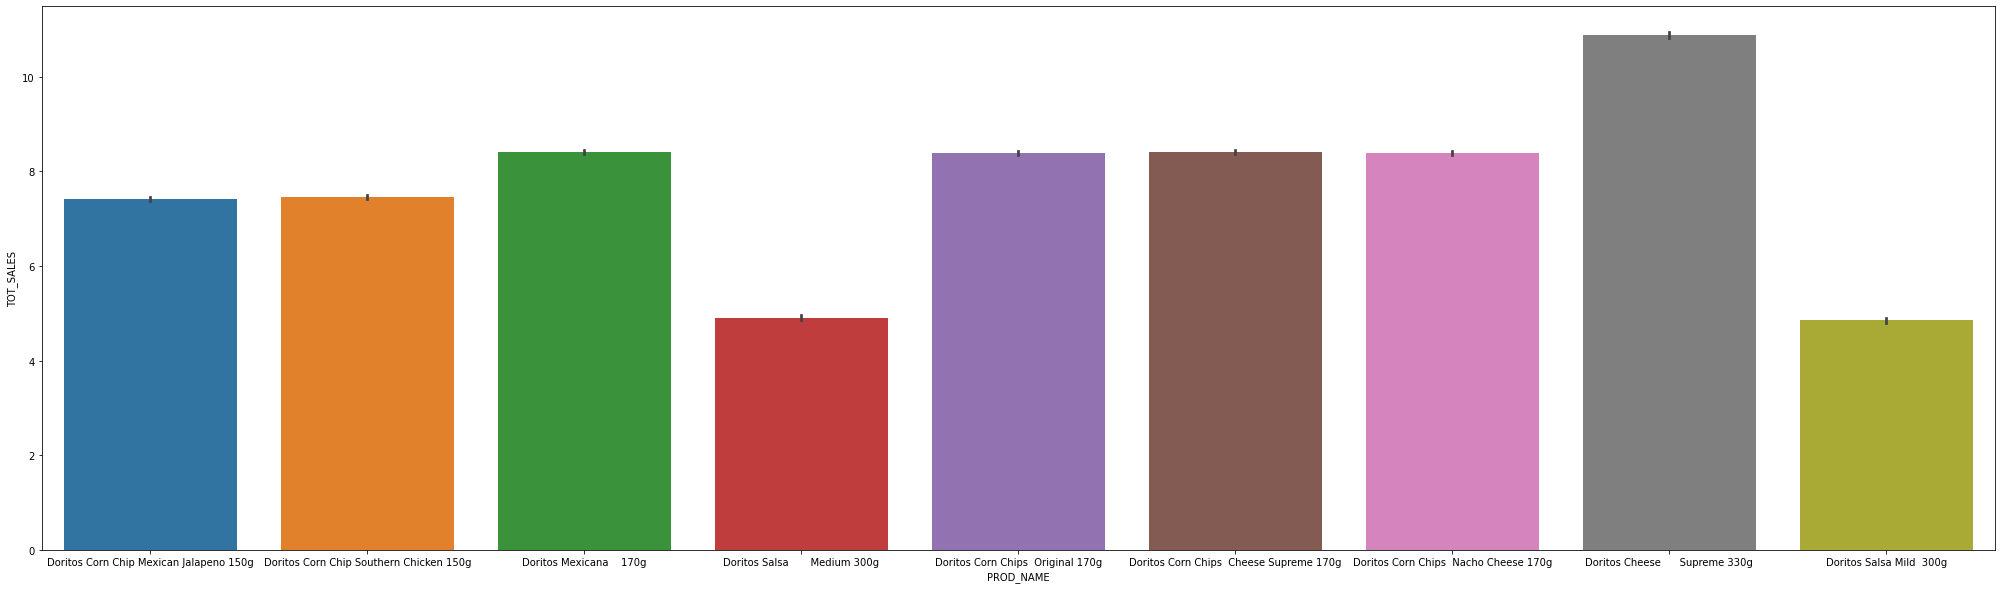

In [10]:
plt.figure(figsize=(35,10))
sns.barplot(y=df3["TOT_SALES"],x=df3["PROD_NAME"],data=df3)

**Total sales for Doritos chips for different variety is shown**

## **Kettle chips Evaluations**

In [11]:
dfKC=df1[df1["PROD_NAME"].str.startswith("Kettle")]
dfKC

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
23,43331,36,36302,33188,32,Kettle Sea Salt And Vinegar 175g,1,5.4
24,43327,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2
27,43600,41,41423,38393,46,Kettle Original 175g,1,5.4
36,43330,51,51113,46828,36,Kettle Chilli 175g,1,5.4
...,...,...,...,...,...,...,...,...
264819,43631,272,272053,269703,46,Kettle Original 175g,2,10.8
264821,43614,272,272105,269792,32,Kettle Sea Salt And Vinegar 175g,2,10.8
264823,43541,272,272156,269855,63,Kettle 135g Swt Pot Sea Salt,2,8.4
264824,43537,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6


In [12]:
dfKC["PROD_NBR"].unique()
dfKC["PROD_NAME"].unique()


array(['Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Kettle Sea Salt     And Vinegar 175g', 'Kettle Original 175g',
       'Kettle Chilli 175g', 'Kettle Mozzarella   Basil & Pesto 175g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Kettle Honey Soy    Chicken 175g',
       'Kettle Sweet Chilli And Sour Cream 175g',
       'Kettle 135g Swt Pot Sea Salt',
       'Kettle Sensations   BBQ&Maple 150g',
       'Kettle Sensations   Siracha Lime 150g',
       'Kettle Tortilla ChpsBtroot&Ricotta 150g',
       'Kettle Tortilla ChpsFeta&Garlic 150g'], dtype=object)

** Below one os the final datasheet for the Kettle chips with total sales and product quantity sold from particular stores 

In [65]:
PN2=(dfKC["PROD_NBR"].unique())
PN2
y=[]
for i in PN2:
    x=dfKC[dfKC["PROD_NBR"]==i].sum()
    y.append(x)
df4=pd.DataFrame(y)
df4["PROD_NBR"]=[108,32,46,36,102,3,88,89,63,17,114,9,60]
df4["PROD_NAME"]=dfKC["PROD_NAME"].unique()
df4=df4.drop(["DATE","STORE_NBR","LYLTY_CARD_NBR","TXN_ID"],axis=1)
df4

,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6258,28786.8
1,32,Kettle Sea Salt And Vinegar 175g,6006,32432.4
2,46,Kettle Original 175g,5967,32216.4
3,36,Kettle Chilli 175g,5744,31012.2
4,102,Kettle Mozzarella Basil & Pesto 175g,6284,33933.6
5,3,Kettle Sensations Camembert & Fig 150g,6121,28142.8
6,88,Kettle Honey Soy Chicken 175g,5976,32270.4
7,89,Kettle Sweet Chilli And Sour Cream 175g,6078,32805.0
8,63,Kettle 135g Swt Pot Sea Salt,6184,25972.8
9,17,Kettle Sensations BBQ&Maple 150g,5871,27006.6


Text(0, 0.5, 'TOT_SALES')

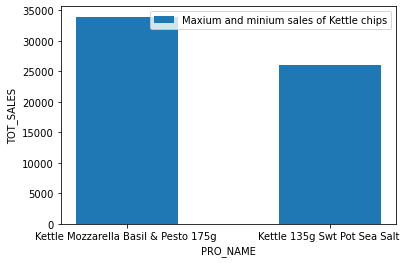

In [15]:
x="Kettle Mozzarella Basil & Pesto 175g ","Kettle 135g Swt Pot Sea Salt "
y=33933.6,25972.8
plt.bar(x,y,width=0.5)
plt.legend(["Maxium and minium sales of Kettle chips"])
plt.xlabel("PRO_NAME")
plt.ylabel("TOT_SALES")


Text(0, 0.5, 'PRO_Quantity')

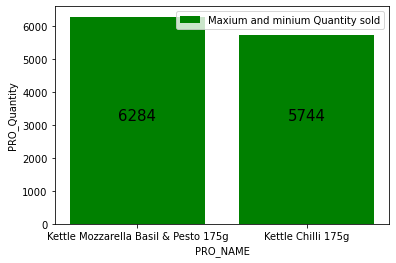

In [16]:
y=df4["PROD_QTY"].max(),df4["PROD_QTY"].min()
x="Kettle Mozzarella Basil & Pesto 175g","Kettle Chilli 175g"
plt.bar(x,y,color="g")

plt.text("Kettle Mozzarella Basil & Pesto 175g",df4["PROD_QTY"].max()//2,s="6284",size=15,ha="center")
plt.text("Kettle Chilli 175g",df4["PROD_QTY"].max()//2,s="5744",size=15,ha="center")
plt.legend(["Maxium and minium Quantity sold"])
plt.xlabel("PRO_NAME")
plt.ylabel("PRO_Quantity")

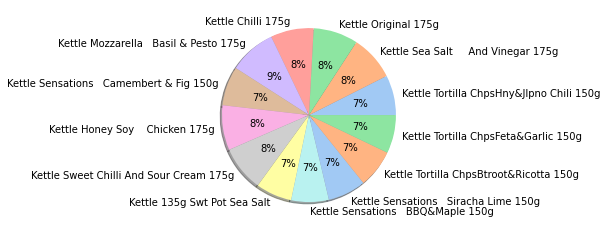

In [17]:
y=df4["PROD_NAME"]
colors = sns.color_palette('pastel')
x=df4["TOT_SALES"]
plt.pie(x,labels=y,colors=colors,shadow=True,autopct="%.0f%%")
warnings.filterwarnings("ignore")


## Pringles CHips

In [18]:
dfPC=df1[df1["PROD_NAME"].str.startswith("Pringles")]
dfPC["PROD_NAME"].unique()
dfPC

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
30,43601,43,43147,39608,99,Pringles Sthrn FriedChicken 134g,1,3.7
31,43600,43,43227,40186,26,Pringles Sweet&Spcy BBQ 134g,4,14.8
62,43599,82,82114,81571,99,Pringles Sthrn FriedChicken 134g,2,7.4
66,43599,83,83062,82438,25,Pringles SourCream Onion 134g,2,7.4
89,43601,119,119051,122366,81,Pringles Original Crisps 134g,1,3.7
...,...,...,...,...,...,...,...,...
264806,43378,271,271013,268301,26,Pringles Sweet&Spcy BBQ 134g,2,7.4
264812,43450,271,271051,268509,62,Pringles Mystery Flavour 134g,2,7.4
264820,43340,272,272105,269790,62,Pringles Mystery Flavour 134g,2,7.4
264822,43312,272,272148,269843,34,Pringles Slt Vingar 134g,2,7.4


In [47]:
PN3=dfPC["PROD_NBR"].unique()
PN3
y1=[]
for b in PN3:
    x1=dfPC[dfPC["PROD_NBR"]==b].sum()
    y1.append(x1)
df5=pd.DataFrame(y1)
df5["PROD_NAME"]=dfPC["PROD_NAME"].unique()
df5["PROD_NBR"]=dfPC["PROD_NBR"].unique()
df5=df5.drop(["STORE_NBR","TXN_ID", "LYLTY_CARD_NBR","DATE"],axis=1)
df5

,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,99,Pringles Sthrn FriedChicken 134g,5874,21722.7
1,26,Pringles Sweet&Spcy BBQ 134g,6050,22385.0
2,25,Pringles SourCream Onion 134g,6022,22281.4
3,81,Pringles Original Crisps 134g,5993,22170.4
4,68,Pringles Chicken Salt Crips 134g,5923,21915.1
5,109,Pringles Barbeque 134g,6087,22521.9
6,62,Pringles Mystery Flavour 134g,5909,21863.3
7,34,Pringles Slt Vingar 134g,5911,21870.7


In [68]:
df5["TOT_SALES"].max(),df5["TOT_SALES"].min()

(22521.9, 21722.7)

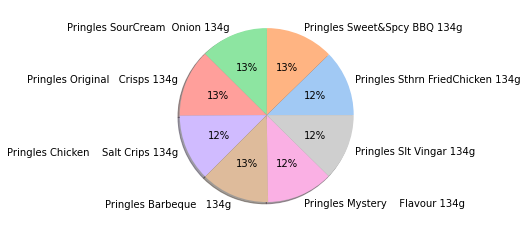

In [49]:
y=df5["PROD_NAME"]
colors = sns.color_palette('pastel')
x=df5["TOT_SALES"]
plt.pie(x,labels=y,colors=colors,shadow=True,autopct="%.0f%%")
warnings.filterwarnings("ignore")